# Dimensionality reduction
- feature selection methods backward elimination, forward selection, and bidirectional elimination (see regression folder)
- feature extraction is principal component analysis, linear discriminant analysis, kernel pca, and quadratic discriminant analysis
- will use the wine dataset https://archive.ics.uci.edu/ml/datasets/wine

### PCA an unsupervised approach to derive a model with a subset of parameters that fully captures the variance / information in the data
- noise filtering
- visualization
- feature extraction
- stock market predictions
- etc
- https://plot.ly/ipython-notebooks/principal-component-analysis/
- http://setosa.io/ev/principal-component-analysis/
- **highly sensitive to outliers!**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.cluster.hierarchy as hc

### Get, split, and scale the data

In [2]:
df = pd.read_csv('Wine.csv')
rows = len(df)
cols = len(df.keys())
print(rows, cols)
df.head()

178 14


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
X = df.iloc[:,0:13].values
y = df.iloc[:,(df.shape[1]-1)].values
print(X[0])
print(y[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
1


### Evaluate a model before PCA

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/tdarrah/anaconda3/envs/auto36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tdarrah/anaconda3/envs/auto36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [6]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[17  0  0]
 [ 0  9  0]
 [ 0  0 10]]
1.0


### View the clusters before PCA

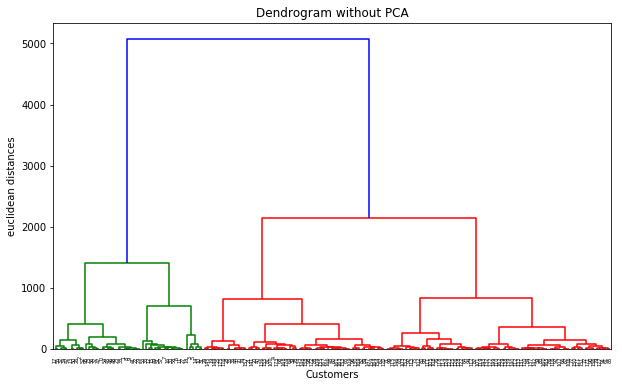

In [17]:
plt.figure(figsize=(10,6))
dendrogram = hc.dendrogram(hc.linkage(df, method='ward'))
plt.title('Dendrogram without PCA')
plt.xlabel('Customers')
plt.ylabel("euclidean distances")
plt.show()

### Apply PCA
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [8]:
X = df.iloc[:,0:13].values
y = df.iloc[:,(df.shape[1]-1)].values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Evaluate the variance of each component
- higher value means variable is more principle
- then update n_components

In [10]:
var = pca.explained_variance_ratio_
print(var)

[0.35644985 0.19487164]


### Fit to logistic Regression

In [11]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/tdarrah/anaconda3/envs/auto36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tdarrah/anaconda3/envs/auto36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
cm = confusion_matrix(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)
print(cm)
print(acc2)

[[16  1  0]
 [ 0  9  0]
 [ 0  0 10]]
0.9722222222222222


### View the decision boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


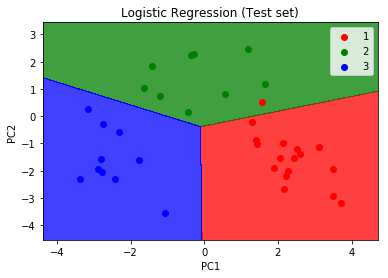

In [13]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

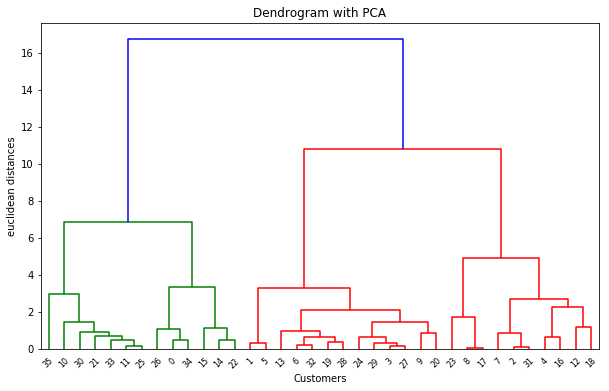

In [16]:
plt.figure(figsize=(10,6))
dendrogram = hc.dendrogram(hc.linkage(X_test, method='ward'))
plt.title('Dendrogram with PCA')
plt.xlabel('Customers')
plt.ylabel("euclidean distances")
plt.show()

### Performance of PCA

In [15]:
print("accuracy with all features: ", acc)
print("accuracy with reduced set : ", acc2)

accuracy with all features:  1.0
accuracy with reduced set :  0.9722222222222222
